In [4]:
import pandas as pd
df = pd.read_csv ("retail_data.csv")

df.head()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,Age,Gender,City,State,Country,...,Unit_Price,Discount,Payment_Mode,Shipping_Cost,Delivery_Days,Returned,Customer_Rating,Total_sales,profit 30%,customer lifetime basic
0,10001,1/3/2024,1/6/2024,C001,John Miller,34,Male,Chicago,Illinois,USA,...,120,0.10,Credit Card,12,3,No,4,216.0,48.0,324.00
1,10002,1/5/2024,1/10/2024,C002,Sarah Lee,29,Female,Dallas,Texas,USA,...,350,0.05,Debit Card,25,5,No,5,332.5,87.5,498.75
2,10003,1/7/2024,1/12/2024,C003,Michael Brown,42,Male,New York,New York,USA,...,1200,0.15,UPI,30,5,No,5,1020.0,180.0,1530.00
3,10004,1/8/2024,1/15/2024,C004,Emma Davis,37,Female,Los Angeles,California,USA,...,90,0.20,Credit Card,15,7,Yes,3,216.0,27.0,324.00
4,10005,1/10/2024,1/13/2024,C005,David Wilson,31,Male,Houston,Texas,USA,...,75,0.05,Cash,8,3,No,4,142.5,37.5,213.75


In [7]:
print(df.columns)

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Customer_ID', 'Customer_Name',
       'Age', 'Gender', 'City', 'State', 'Country', 'Segment',
       'Product_Category', 'Product_Name', 'Quantity', 'Unit_Price',
       'Discount', 'Payment_Mode', 'Shipping_Cost', 'Delivery_Days',
       'Returned', 'Customer_Rating', 'Total_sales', 'profit 30%',
       'customer lifetime basic '],
      dtype='str')


In [42]:
customer_data = df.groupby("Customer_ID").agg({
    "Age": "first",
    "Total_sales": "sum",
    "Quantity": "sum"
}).reset_index()

customer_data.head()

,Customer_ID,Age,Total_sales,Quantity
0,C001,34,216.0,2
1,C002,29,332.5,1
2,C003,42,1020.0,1
3,C004,37,216.0,3
4,C005,31,142.5,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(
    customer_data[["Age", "Total_sales", "Quantity"]]
)
#customer_data.head()

,Customer_ID,Age,Total_sales,Quantity
0,C001,34,216.0,2
1,C002,29,332.5,1
2,C003,42,1020.0,1
3,C004,37,216.0,3
4,C005,31,142.5,2


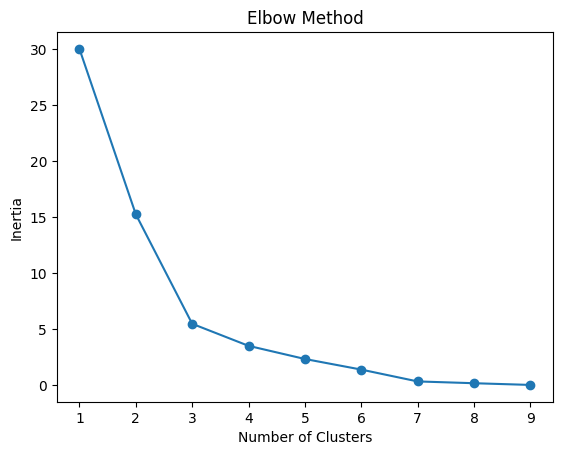

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

customer_data.head()


,Customer_ID,Age,Total_sales,Quantity,Cluster
0,C001,34,216.0,2,0
1,C002,29,332.5,1,2
2,C003,42,1020.0,1,1
3,C004,37,216.0,3,0
4,C005,31,142.5,2,0


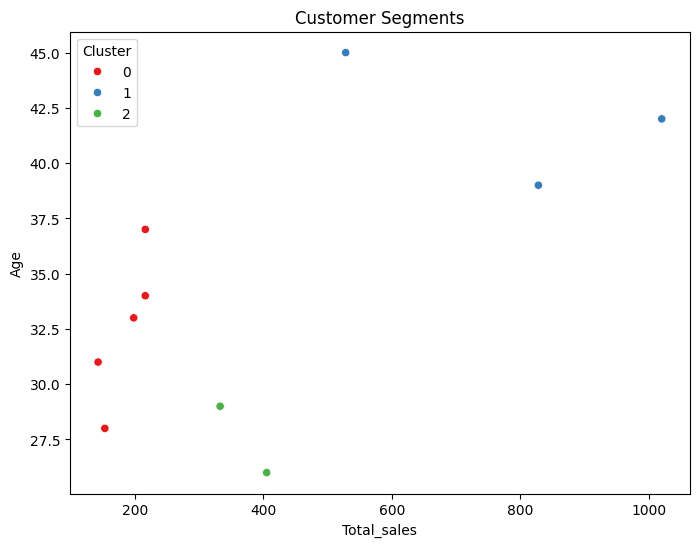

In [49]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=customer_data,
    x="Total_sales",
    y="Age",
    hue="Cluster",
    palette="Set1"
)

plt.title("Customer Segments")
plt.show()


In [ ]:
logistic regression for binary classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [64]:
record = pd.read_csv ("retail_data.csv")

record.head()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,Age,Gender,City,State,Country,...,Unit_Price,Discount,Payment_Mode,Shipping_Cost,Delivery_Days,Returned,Customer_Rating,Total_sales,profit 30%,customer lifetime basic
0,10001,1/3/2024,1/6/2024,C001,John Miller,34,Male,Chicago,Illinois,USA,...,120,0.10,Credit Card,12,3,No,4,216.0,48.0,324.00
1,10002,1/5/2024,1/10/2024,C002,Sarah Lee,29,Female,Dallas,Texas,USA,...,350,0.05,Debit Card,25,5,No,5,332.5,87.5,498.75
2,10003,1/7/2024,1/12/2024,C003,Michael Brown,42,Male,New York,New York,USA,...,1200,0.15,UPI,30,5,No,5,1020.0,180.0,1530.00
3,10004,1/8/2024,1/15/2024,C004,Emma Davis,37,Female,Los Angeles,California,USA,...,90,0.20,Credit Card,15,7,Yes,3,216.0,27.0,324.00
4,10005,1/10/2024,1/13/2024,C005,David Wilson,31,Male,Houston,Texas,USA,...,75,0.05,Cash,8,3,No,4,142.5,37.5,213.75


In [65]:
#view basic info and missing values
print (record.info())
print (record.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  10 non-null     int64  
 1   Order_Date                10 non-null     str    
 2   Ship_Date                 10 non-null     str    
 3   Customer_ID               10 non-null     str    
 4   Customer_Name             10 non-null     str    
 5   Age                       10 non-null     int64  
 6   Gender                    10 non-null     str    
 7   City                      10 non-null     str    
 8   State                     10 non-null     str    
 9   Country                   10 non-null     str    
 10  Segment                   10 non-null     str    
 11  Product_Category          10 non-null     str    
 12  Product_Name              10 non-null     str    
 13  Quantity                  10 non-null     int64  
 14  Unit_Price              

In [66]:
#remove duplicates
record.drop_duplicates()
print (record.duplicated().sum())   

0


In [ ]:
'''record['Order_Date'] = pd.to_datetime(record['Order_Date'])
record['Ship_Date'] = pd.to_datetime(record['Ship_Date'])
record['Customer_ID'] = record['Customer_ID'].astype('string')
record['Customer_Name'] = record['Customer_Name'].astype('string')

In [79]:
#Convert dates to numeric values
record['Order_Date'] = pd.to_datetime(record['Order_Date']).astype('int64') // 10**9
record['Ship_Date'] = pd.to_datetime(record['Ship_Date']).astype('int64') // 10**9
#Encode categorical IDs as numbers
record['Customer_ID'] = record['Customer_ID'].astype('category').cat.codes
record['Order_ID'] = record['Order_ID'].astype('category').cat.codes
record.dropna(inplace=True) #to drop rows with any remaining missing values

In [80]:
#remove outliers (ex:- using z-score or IQR method)
from scipy import stats
record = record[(np.abs(stats.zscore(record.select_dtypes(include='number'))) < 3).all(axis=1)]

In [81]:
#save the clean version of the dataset
record.to_csv('retail_data_cleaned.csv', index=False)

In [83]:
x = record[["Order_ID","Order_Date","Ship_Date","Customer_ID","Quantity","Unit_Price","Discount","Delivery_Days"]]
#col_name= ["feature_names"]
y = record["Returned"]
print(x)

Empty DataFrame
Columns: [Order_ID, Order_Date, Ship_Date, Customer_ID, Quantity, Unit_Price, Discount, Delivery_Days]
Index: []


In [76]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [59]:
LR= LogisticRegression()
LR.fit(x_train,y_train)

ValueError: could not convert string to float: 'C006'

In [ ]:
#remove outliers (ex:- using z-score, threshold of 3 standard deviations)
from scipy import stats
numeric_cols = record.select_dtypes(include='number').columns
z_scores = np.abs(stats.zscore(record[numeric_cols]))
record = record[(z_scores < 3).all(axis=1)]
print(f"Rows remaining after outlier removal: {len(record)}")

Order_ID                      int64
Order_Date                      str
Ship_Date                       str
Customer_ID                     str
Customer_Name                   str
Age                           int64
Gender                          str
City                            str
State                           str
Country                         str
Segment                         str
Product_Category                str
Product_Name                    str
Quantity                      int64
Unit_Price                    int64
Discount                    float64
Payment_Mode                    str
Shipping_Cost                 int64
Delivery_Days                 int64
Returned                        str
Customer_Rating               int64
Total_sales                 float64
profit 30%                  float64
customer lifetime basic     float64
dtype: object


In [172]:
import pandas as pd

# Create DataFrame with a column 'Order_Date'
data = pd.DataFrame({'Order_Date': ['Wireless Headphones','Office Chair','Winter Jacket',
'Skincare Kit','Dashboard','Standing Desk','Sneakers','Tablet','Smartphone','Perfume','Tablet']})\

# One-Hot Encode the 'Order_Date' column
new = pd.get_dummies(data, columns=['Order_Date'])

print(new)


    Order_Date_Dashboard  Order_Date_Office Chair  Order_Date_Perfume  \
0                  False                    False               False   
1                  False                     True               False   
2                  False                    False               False   
3                  False                    False               False   
4                   True                    False               False   
5                  False                    False               False   
6                  False                    False               False   
7                  False                    False               False   
8                  False                    False               False   
9                  False                    False                True   
10                 False                    False               False   

    Order_Date_Skincare Kit  Order_Date_Smartphone  Order_Date_Sneakers  \
0                     False                  Fal

In [ ]:
x = record[["Order_ID","Order_Date","Ship_Date","Customer_ID","Quantity","Unit_Price","Discount","Delivery_Days"]]
y = record["Returned"]
print(x.head())
print(y.head())

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Customer_ID', 'Customer_Name',
       'Age', 'Gender', 'City', 'State', 'Country', 'Segment',
       'Product_Category', 'Product_Name', 'Quantity', 'Unit_Price',
       'Discount', 'Payment_Mode', 'Shipping_Cost', 'Delivery_Days',
       'Returned', 'Customer_Rating', 'Total_sales', 'profit 30%',
       'customer lifetime basic '],
      dtype='str')

In [175]:
X= record[["Quantity","Delivery_Days"]]
y= record["Returned"] 

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)